# Лаб2

### Продолжение. Сверточные слои, мониторинг метрик, обучение на GPU.
Разные слои, хорошо работает сверточная с меньшим количеством параметров. 
Дать готовую конкретную архитектуру с параметрами. И обучаем. 
Показываем точность и картинка-label. Выводим архитектуру модели. (просмотр графа обученной модели в netron.app ?)
График обучения по эпохам на тесте и деве.
Приводим просто пример в методе, как выглядит переобучение.


### Применение


### Задание
По заданию выбрать свои классы и обучить сверточную нейронную сеть до 70% точности. Провести три обучения для 3 разных тактик пуллинга: пуллинг с помощью шага свёртки stride, макс пуллинг, усредняющий пуллинг. Сравнить достигнутое качество, время обучения и степень переобучения. Выбрать лучшую конфигурацию. Сохранить модель. Перезапустить среду выполнения - теряются все текующие переменные.

Загрузить в colab готовую уже обученную на cifar100 модель. Преобразовать в onnx и сохранить на локале.

Визуализировать две модели в netron.app

Скачивают html-файл с двумя кнопками и встроить в него два файла моделей - обученную на прошлой ЛР и на ЛР2.

Скачать картинки из интернета и открыть их в html по кнопке. Автоматом в скрипте масштабируется изображение.

Выбрать в js нужные классы для готовой модели.

Проверить на устойчивость обе модели, полносвязную и свёрточную, двигая картинку, убедиться в наличии свойства инвариантности сверточного слоя.



## Методы и пояснения

Библиотеки:

* __np__ - библиотека NumPy для работы с многомерными массивами данных
* __tqdm__ - быстрый, расширяемый индикатор выполнения для Python и командной строки, tqdm происходит от арабского слова taqaddum (بقدّم), которое может означать "прогресс". Данная библиотека используется "под капотом" в фреймворке для обучения моделей tensorflow - альтернативне PyTorch.
* __IPython__ - библиотека предоставляет богатый инструментарий, который поможет максимально эффективно использовать Python в интерактивном режиме, в данной лабораторной будет использован модуль __display__
* __matplotlib__ - библиотека для построения графиков, по большей части повторяет API Matlab'a
* __torch__ - библиотека Pytorch для глубокого обучения нейронных сетей
* __torchsummary__ - у Keras есть удобный API для просмотра визуализации модели, что очень полезно при отладке нейросети. Данная библиотка имитирует то же самое в PyTorch. Цель состоит в том, чтобы предоставить информацию, дополняющую то, что не предоставляется строковой репрезентацией модели PyTorch

### Методы и функции NumPy:

(Подробнее в документации https://numpy.org/doc/1.22/reference/index.html)

* __np.percentile__ - Вычисляет q-й процентиль данных многомерного массива указанной оси. Возвращает q-й процентиль(проценты) элементов массива. Первым аргументом передается входной массив, вторым - требуемый персентиль (в процентах!!!). Медиана - частный случай персентиля, медиана соответствует 50%-персентилю. Таким образом, для массива arr медиану можно расчитать при помощи выражения `np.percentile(arr, 50)`. Первый и третий квартили Q1 и Q3 соответствуют 25% и 75%-ым персентилями соответственно. Номер оси указывается через параметр axis. По умолчанию персентиль считается по всем элементам массива. Если массив двухмерный и в качестве axis указано значение 0, то персентили будут расчитаны для каждого столбца массива. На практике удобно использовать для получения оценки размаха выборочных данных и построения доверительных интервалов.


### Методы и функции tqdm
(Документация: https://github.com/tqdm/tqdm#documentation)

* __auto.tqdm__ - создаёт обёртку-декоратор поверх итерируемого объекта, возвращая итератор, который действует точно так же, как исходный итерируемый, но выводит динамически обновляемый индикатор выполнения каждый раз, когда запрашивается значение. Например, если присвоить `trange = tqdm(range(10))`, то при итерации по новому объекту будет обновляться прогресс-бар. На практике в ряде случаев бывает нецелесообразно делать обёртку вокруг итератора, поскольку могут возникнуть утечки памяти. В этом случае можно ничего не передавать в качестве аргумента: `pbar = tqdm()`, а в дальнейшем при необходимости инкрементировать счётчик вручную при помощи метода __update__: `pbar.update(1)`. Если известен граничное значение итерации, то можно его задать при создании объекта при помоши параметра __total__: `pbar = tqdm(total=1000)`. Если update будет слишком большим числом, то частота обновления индикатора прогресса адаптивно уменьшится. Чтобы этого избежать, необходимо передать конкретное значение параметру __miniters__. В таком случае индикатор будет обновляться каждые miniters итераций.
* __auto.trange__ - `trange(x)`является синтаксическим сахаром для `tqdm(range(x))`

Модуль __auto__ автоматически опредляет среду исполнения кода (jupyter notebook, командная строка, графическое приложение...) и использует соответствующий метод. Вместо этого можно использовать оригинальные модули: __tqdm.tqdm__, __tqdm.notebook__, __tqdm.gui__


### Методы и функции IPython
(Документация: https://ipython.readthedocs.io/en/stable/api/index.html)


Данная библиотека содержит множество полезных модулей, которые пригодятся в повседневной практике. В данной лабораторной работе будет использован лишь модуль __display__

* __display.clear_output__ - вызов этой функции очищает вывод ячейки текущего выполняемого кода. На практике может быть использовано для отображения не столь динамичных графиков и рисунков (когда не требуется высокая частота отрисовки). Вывод десятков и сотней рисунков, что порой осуществляется начинающими исследователями, может нагрузить jupyter notebook и привести к нежелательным подтормаживаниям. Поэтому если в реальности необходимо лишь монитроинг последнего актуального графика или рисунка, то рекомендуется использовать данную функцию.



### Методы и функции Matplotlib

(Документация: https://matplotlib.org/stable/api/index.html)

Принятые сокращения:
* matplotlib.pyplot - plt

Методы:
* __plt.subplots__ - довольно часто требуется выводить сразу несколько графиков на экран одновременно. В matplotlib существует не один способ добиться этой цели. Наиболее простым является использование метода __plt.subplots__. Он создает N на М холстов для отрисовки, где N - число строк, M - число столбцов. Эти значения задаются первыми двумя аргументами. Удобно думать об этом как о таблице (например в Ворд или Эксель), элементами которой являются рисунки. Тем самым для создания таблицы с 2 строками и 3 столбцами необходимо написать `plt.subplots(2, 3)`. Размеры итоговой таблицы контролируются параметром __figsize__. Ему следует передать кортеж из двух чисел, где первое значение соответвует ширине таблицы, а второе - высоте. Значения задаются в дюймах. Данная функция возвращает два объекта, но нам интересен лишь второй из них - массив из холстов. Если число строк или столбцов равняется 1, то данный массив одномерный, а иначе первый индекс задаёт номер строки таблицы, а второй - номер столбца. У элемента массива холстов можно вызывать ранее описанные функции (plot, scatter...). Однако для методов, меняющих конфигурацию холста, например xlim или title, следует приписывать префикс __set\___
* __plt.fill_between__ - рисует график по точкам, при этом заполняя пространство между отсчетами второго и третьего аргумента. Первым аргументом передаются x-координаты, вторым - нижние у-координаты, третьим - верхние y-координаты. У данного метода обязательно передавать х координаты. Повторяет опциональные параметры метода __plt.plot__. Самым полезным параметром является alpha - прозрачность заливки, число от 0 (заливка не видна) до 1 (заливка сплошная).
* __plt.grid__ - рисует сетку на графике. Можно не передавать никаких аргументов, в таком случае будет отображена как сетка для горизонтальной оси, так и сетка для вертикальной оси. Это равносильно передачи параметру __axis__ значения 'both'. Для отрисовки только сетки для вертикальной оси следует передать значение 'y'. Для горизонтальной - 'x'. По умолчанию сетка строится для главных отметок (главные отметки - те отметки, имеющие численное пояснение). Это соответствует передачи 'major' в качестве аргумента параметру __which__. Для отрисовки незначимых отсечек необходимо передать значение 'minor'. Для повышения различия между этими двумя видами осей принято изменять параметр прозрачности сетки __alpha__ одной из них.
* __plt.title__ - отображает заголовок у холста. В качестве аргумента в простейшем случае передаётся строка. Если требуется добавить название к элементу многохолстового рисунка, данный метод следует вызывать с припиской __set\___





### Методы и функции PyTorch

(Документация: https://pytorch.org/docs/stable/index.html)

__Принятые сокращения__: 
* torch.nn - nn
* torch.nn.functional - F
* torch.optim - optim

__Методы__:
* __torch.Tensor__ - cоздает тензор из многомерного массива Numpy и наследует его тип данных. По умолчанию память под тензоры выделяется на CPU. При выставлении флага __requires_grad__ автоматически отслеживает градиенты с помощью движка autograd, который строит динамический вычислительный граф. Включить отслеживания тензора __t__ можно так же при помощи метода __t.requires_grad_(True)__. В таком случае после вызова метода __backward__, в поле __grad__ будут записаны производные. Производные тензора __t__ можно очистить вызовом метода __t.grad.zero_()__. Для того чтобы отсечь ненужные вычисления производных используется метод __detach__, который создаёт копию тензора, при этом флаг __requires_grad__ снимается и отслеживание движком autograd прекращается.

* __torch.cuda.is_available__ - возвращает флаг True, если на машине обнаружен графический процессор.

* __torch.device__ - содержит тип устройства ("cpu" или "cuda") и дополнительный порядковый номер устройства для типа устройства. Если порядковый номер устройства отсутствует, этот объект всегда будет представлять текущее устройство, даже после вызова функции torch.cuda.set_device(). Операции между тензорами осуществимы, только если они находятся на одном устройстве.

* __torch.cpu__ - переносит тензор на CPU. Нахождение тензора на cpu является обязательным требованием для того, чтобы вызвать метод __torch.numpy__.

* __torch.permute__ - соответствует __np.transpose__, рассмотренному в ЛР1. Можно вызывать как метод тензора t: `t.permute(1, 0)` - поменяет оси 0 и 1 местами, равносильно транспонированию `t.t()`. Для конвертации пакета изображений в формате NHWC в формат изображений NCHW достаточно написать `t.permute(0, 3, 1, 2)`

* __torch.argmax__ - соответствует API __np.argmax__. Можно вызывать как метод тензора. Удобно использовать для реализации метрики доли правильных ответов.

* __torch.onnx.export__ - экспортирует PyTorch модель в формат onnx. Формат onnx был разработан компанией Microsoft и часто используется при выкате моделей в продакшн. 

__Создание свёрточных моделей__:

В данной лабораторной работе будут затронуты следующие новые блоки модуля torch.nn (выделены): 
* полносвязный слов Linear
* __свёрточный слой Conv2d__
* __пуллинг MaxPool2d__
* нормализация BatchNorm2d
* множество активационных функций ReLU, Softmax, Tanh
* слои-регуляризаторы, например Dropout

Для создания свёрточной модели необходимо соблюсти следующие два условия: 

1. Входной тензор имеет ранг 4, т.е. его форма (b, c, h, w), где b - размер пакета, c - число каналов изображения в пакете, h - высота изображения в пакете, w - ширина изображения в пакете. В рамках пакета размер картинки строго фиксируется. В рамках эпохи это требования не является обазательным, посколько динамический вычислительных граф модели PyTorch строится каждый раз по новой, а параметры свёрточного слоя не зависит от ширины и высоты входного тензора.
2. Использование самих свёрточных слоёв

На самом деле, стоит уточнить, что рассматриваются двухмерные свёртки, поскольку они представляют наибольших интерес для практического использования.Для свёрточных слоёв иного типа предъявляются иные требования. Например, для одномерных свёрток требуется тензор с рангом 3. В дальнейшем под свёрточным слоем будем подразумевать двухмерный сверточных слой.

Заметьте, что для PyTorch входной пакет изображений должен быть представлен в формате NCHW, а не привычном NHWC, который используется большинством библетек для визуализации. Это обусловлено тем фактом, что в таком формате применение операции свёртки производится быстрее.

Также следует отметить, что у черно-белых изображений в большинстве случаев отсутствует размерность, отвечающая за номер канала. Поэтому необходимо искуственно её добавлять при помощи метода __torch.reshape__, рассмотренного в прошлой лабораторной работе.

Свёрточный блок состоит из следующих компонент:

1. Двумерная свёртка
2. Функция активации
3. Слой пуллинг (опционально)

И может быть описан в PyTorch следующим образом: 

    conv1 = nn.Sequential(
      nn.Conv2d(3, 16, 5),
      nn.ReLU(),
      nn.MaxPool2d(2)
    )
  
Здесь 3 - число входных каналов, 16 - число выходных каналов, 5 - размер ядра свёрточного фильтра, 2 у MaxPool2d - пуллинг окном 2х2.

Общее число параметров свёрточного слоя описывается двумя тензорами - тензором весов и тензором смещений. Для данного примера тензор весов имеет размерность 3x16x5x5, тензор смещений - 16. Т.е. смещение применяется поканально к выходному тензору после применения всех 3х16 фильтров. Итоговое число параметров:

    3*16*5*5+16 = 1216. 

Число параметров у слоя перцептрона со скрытом слоя из 16 нейронов для картинки размером 32 на 32 пикселя равняется

    32*32*3*16 + 16 = 49168

Разница на порядок.

Число входных и выходных каналов может быть любым. Размер же ядра свёртки должен быть __нечётным__ числом (1, 3, 5..). У сверточного слоя nn.Conv2d также имеются и другие параметры, которые можно указывать.

Одним из таких параметров является padding - добавление рамки к тензору перед применением операции свёртки. По умолчанию ноль. Для того, чтобы итоговый размер тензора (имеется в виду его ширина и высота) после операции свёртки равняется размеру тензора до применения операции свёртки, необходимо устанавливать значение равное (K-1)/2, где K - размер ядра свёртки. Для ядра размером 3x3, необходимо передать 1 в качестве аргумента padding.

Ещё часто используемым на практике параметром является stride - шаг свёртки. По умолчанию он равен 1. Если шаг свёртки равен 2, то размер выходного тензора уменьшится вдвое, как и объём операций, Это часто используется на практике как альтернатива слоёв-пуллинга.




__Обучение на GPU__:

Для получения графического устройства в Python необходимо вызвать следующую команду:

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Для обучения на GPU необходимо выполнить две следующие вещи:

1. Перенести модель на GPU


    model.to(device)

2. Перенести батч на GPU


    inputs, labels = inputs.to(device), labels.to(device)

Для преобразования предсказаний модели, размещённой на графическом устройстве, необходимо перенести выходной тензор обратно на процессор:

    outputs = model(inputs).detach().cpu().numpy()



## Импортирование необходимых библиотек

In [ ]:
#!pip install torchsummary
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torchsummary import summary
import pickle
from sklearn.metrics import classification_report
from PIL import Image
from tqdm.auto import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

# Часть 1. Классификация изображений CIFAR100

## Определяем видеокарту GPU, чтобы на ней учить нейронную сеть

In [ ]:
!nvidia-smi

Mon Feb  7 11:00:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Загрузка и распаковка набора данных CIFAR100

In [ ]:
!wget https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz
!tar -xvzf cifar-100-python.tar.gz

--2022-02-07 11:01:03--  https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169001437 (161M) [application/x-gzip]
Saving to: ‘cifar-100-python.tar.gz’

cifar-100-python.ta 100%[===================>] 161.17M  50.0MB/s    in 3.5s    

2022-02-07 11:01:07 (45.6 MB/s) - ‘cifar-100-python.tar.gz’ saved [169001437/169001437]

cifar-100-python/
cifar-100-python/file.txt~
cifar-100-python/train
cifar-100-python/test
cifar-100-python/meta


## Чтение тренировочной и тестовой выборки

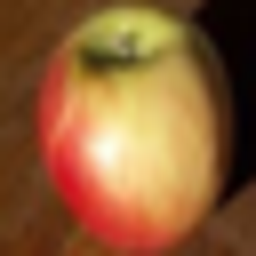

In [ ]:
with open('cifar-100-python/train', 'rb') as f:
    data_train = pickle.load(f, encoding='latin1')
with open('cifar-100-python/test', 'rb') as f:
    data_test = pickle.load(f, encoding='latin1')

# Здесь указать ваши классы по варианту!!!
CLASSES = [0, 55, 58]

train_X = data_train['data'].reshape(-1, 3, 32, 32)
train_X = np.transpose(train_X, [0, 2, 3, 1]) # NCWC -> NWHC
train_y = np.array(data_train['fine_labels'])
mask = np.isin(train_y, CLASSES)
train_X = train_X[mask].copy()
train_y = train_y[mask].copy()
train_y = np.unique(train_y, return_inverse=1)[1]
del data_train

test_X = data_test['data'].reshape(-1, 3, 32, 32)
test_X = np.transpose(test_X, [0, 2, 3, 1])
test_y = np.array(data_test['fine_labels'])
mask = np.isin(test_y, CLASSES)
test_X = test_X[mask].copy()
test_y = test_y[mask].copy()
test_y = np.unique(test_y, return_inverse=1)[1]
del data_test
Image.fromarray(train_X[50]).resize((256,256))

## Создание Pytorch DataLoader'a

In [ ]:
batch_size = 128
dataloader = {}
for (X, y), part in zip([(train_X, train_y), (test_X, test_y)],
                        ['train', 'test']):
    tensor_x = torch.Tensor(X)
    tensor_y = F.one_hot(torch.Tensor(y).to(torch.int64),
                                     num_classes=len(CLASSES))/1.
    dataset = TensorDataset(tensor_x, tensor_y) # создание объекта датасета
    dataloader[part] = DataLoader(dataset, batch_size=batch_size, shuffle=True) # создание экземпляра класса DataLoader
dataloader

{'test': <torch.utils.data.dataloader.DataLoader at 0x7f8697bd6c10>,
 'train': <torch.utils.data.dataloader.DataLoader at 0x7f8697bd6f50>}

## Создание Pytorch модели многослойного перцептрона с одним скрытым слоем

In [ ]:
class Normalize(nn.Module):
    def __init__(self, mean, std):
        super(Normalize, self).__init__()
        self.mean = torch.tensor(mean).to(device)
        self.std = torch.tensor(std).to(device)

    def forward(self, input):
        x = input / 255.0
        x = x - self.mean
        x = x / self.std
        return x.permute(0, 3, 1, 2) # nhwc -> nm

class GlobalMaxPool2d(nn.Module):
    def __init__(self):
        super(GlobalMaxPool2d, self).__init__()

    def forward(self, input):
        out = F.adaptive_max_pool2d(input, output_size=1)
        return out.flatten(start_dim=1)

class Cifar100_MLP(nn.Module):
    def __init__(self, hidden_size=32, classes=100):
        super(Cifar100_MLP, self).__init__()
        # https://blog.jovian.ai/image-classification-of-cifar100-dataset-using-pytorch-8b7145242df1
        self.seq = nn.Sequential(
            Normalize([0.5074,0.4867,0.4411],[0.2011,0.1987,0.2025]),
            # первый способ уменьшения размерности картинки - через stride
            nn.Conv2d(3, HIDDEN_SIZE, 5, stride=4, padding=2),
            nn.ReLU(),
            # второй способ уменьшения размерности картинки - через слой пуллинг
            nn.Conv2d(HIDDEN_SIZE, HIDDEN_SIZE*2, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.AvgPool2d(4),#nn.MaxPool2d(4),
            nn.Flatten(),
            nn.Linear(HIDDEN_SIZE*8, classes),
        )

    def forward(self, input):
        return self.seq(input)

HIDDEN_SIZE = 32
model = Cifar100_MLP(hidden_size=HIDDEN_SIZE, classes=len(CLASSES))
# NEW
model.to(device)
print(model(torch.rand(1, 32, 32, 3).to(device)))
summary(model, input_size=(32, 32, 3))
model

tensor([[-0.1539, -0.0848, -0.4198]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         Normalize-1            [-1, 3, 32, 32]               0
            Conv2d-2             [-1, 32, 8, 8]           2,432
              ReLU-3             [-1, 32, 8, 8]               0
            Conv2d-4             [-1, 64, 8, 8]          18,496
              ReLU-5             [-1, 64, 8, 8]               0
         AvgPool2d-6             [-1, 64, 2, 2]               0
           Flatten-7                  [-1, 256]               0
            Linear-8                    [-1, 3]             771
Total params: 21,699
Trainable params: 21,699
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.12
Params size (MB): 0.08
Estimated Total Size (MB): 0.22
---------------------

Cifar100_MLP(
  (seq): Sequential(
    (0): Normalize()
    (1): Conv2d(3, 32, kernel_size=(5, 5), stride=(4, 4), padding=(2, 2))
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): AvgPool2d(kernel_size=4, stride=4, padding=0)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=256, out_features=3, bias=True)
  )
)

## Выбор функции потерь и оптимизатора градиентного спуска

In [ ]:
criterion = nn.CrossEntropyLoss()
# используется SGD c momentum
optimizer = optim.SGD(model.parameters(), lr=5e-3, momentum=0.9)

## Обучение модели по эпохам

  0%|          | 0/6000 [00:00<?, ?it/s]

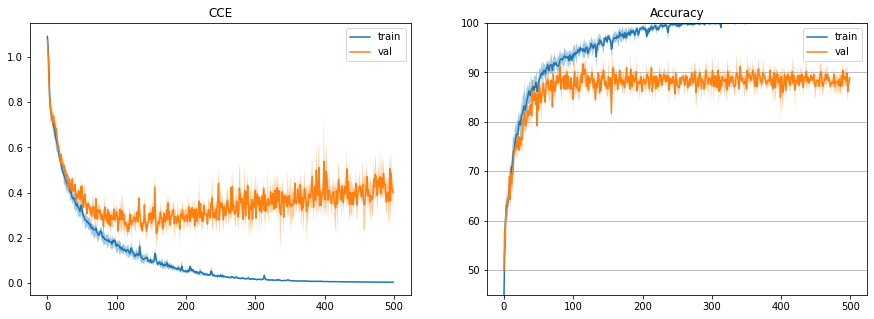

Обучение закончено за 53.69250702857971 секунд


In [ ]:
EPOCHS = 500
REDRAW_EVERY = 20
steps_per_epoch = len(dataloader['train'])
steps_per_epoch_val = len(dataloader['test'])
# NEW
pbar = tqdm(total=EPOCHS*steps_per_epoch)
losses = []
losses_val = []
passed = 0
for epoch in range(EPOCHS):  # проход по набору данных несколько раз
    #running_loss = 0.0
    tmp = []
    model.train()
    for i, batch in enumerate(dataloader['train'], 0):
        # получение одного минибатча; batch это двуэлементный список из [inputs, labels]
        inputs, labels = batch
        # на GPU
        inputs, labels = inputs.to(device), labels.to(device)

        # очищение прошлых градиентов с прошлой итерации
        optimizer.zero_grad()

        # прямой + обратный проходы + оптимизация
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        #loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()

        # для подсчёта статистик
        #running_loss += loss.item()
        accuracy = (labels.detach().argmax(dim=-1)==outputs.detach().argmax(dim=-1)).\
                    to(torch.float32).mean().cpu()*100
        tmp.append((loss.item(), accuracy.item()))
        pbar.update(1)
    #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / steps_per_epoch:.3f}')
    losses.append((np.mean(tmp, axis=0),
                   np.percentile(tmp, 25, axis=0),
                   np.percentile(tmp, 75, axis=0)))
    #running_loss = 0.0
    tmp = []
    model.eval()
    with torch.no_grad(): # отключение автоматического дифференцирования
        for i, data in enumerate(dataloader['test'], 0):
            inputs, labels = data
            # на GPU
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            #running_loss += loss.item()
            accuracy = (labels.argmax(dim=-1)==outputs.argmax(dim=-1)).\
                        to(torch.float32).mean().cpu()*100
            tmp.append((loss.item(), accuracy.item()))
    #print(f'[{epoch + 1}, {i + 1:5d}] val loss: {running_loss / steps_per_epoch_val:.3f}')
    losses_val.append((np.mean(tmp, axis=0),
                       np.percentile(tmp, 25, axis=0),
                       np.percentile(tmp, 75, axis=0)))
    if (epoch+1) % REDRAW_EVERY != 0:
        continue
    clear_output(wait=False)
    passed += pbar.format_dict['elapsed']
    pbar = tqdm(total=EPOCHS*steps_per_epoch, miniters=5)
    pbar.update((epoch+1)*steps_per_epoch)
    x_vals = np.arange(epoch+1)
    _, ax = plt.subplots(1, 2, figsize=(15, 5))
    stats = np.array(losses)
    stats_val = np.array(losses_val)
    ax[1].set_ylim(stats_val[:, 0, 1].min()-5, 100)
    ax[1].grid(axis='y')
    for i, title in enumerate(['CCE', 'Accuracy']):
        ax[i].plot(x_vals, stats[:, 0, i], label='train')
        ax[i].fill_between(x_vals, stats[:, 1, i],
                           stats[:, 2, i], alpha=0.4)
        ax[i].plot(x_vals, stats_val[:, 0, i], label='val')
        ax[i].fill_between(x_vals,
                           stats_val[:, 1, i],
                           stats_val[:, 2, i], alpha=0.4)
        ax[i].legend()
        ax[i].set_title(title)
    plt.show()
print('Обучение закончено за %s секунд' % passed)

## Проверка качества модели по классам на обучающей и тестовой выборках

In [ ]:
for part in ['train', 'test']:
    y_pred = []
    y_true = []
    with torch.no_grad(): # отключение автоматического дифференцирования
        for i, data in enumerate(dataloader[part], 0):
            inputs, labels = data
             # на GPU
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs).detach().cpu().numpy()
            y_pred.append(outputs)
            y_true.append(labels.cpu().numpy())
        y_true = np.concatenate(y_true)
        y_pred = np.concatenate(y_pred)
        print(part)
        print(classification_report(y_true.argmax(axis=-1), y_pred.argmax(axis=-1),
                                    digits=4, target_names=list(map(str, CLASSES))))
        print('-'*50)

train
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       500
          55     1.0000    1.0000    1.0000       500
          58     1.0000    1.0000    1.0000       500

    accuracy                         1.0000      1500
   macro avg     1.0000    1.0000    1.0000      1500
weighted avg     1.0000    1.0000    1.0000      1500

--------------------------------------------------
test
              precision    recall  f1-score   support

           0     0.8899    0.9700    0.9282       100
          55     0.8500    0.8500    0.8500       100
          58     0.9121    0.8300    0.8691       100

    accuracy                         0.8833       300
   macro avg     0.8840    0.8833    0.8824       300
weighted avg     0.8840    0.8833    0.8824       300

--------------------------------------------------


# Сохранение модели в ONNX

In [ ]:
# сохраниение модели
# ПЕРВЫЙ СПОСОБ: сохранение параметров
PATH = 'cifar_cnn.pth'
torch.save(model.state_dict(), PATH)
# загрузка
new_model = Cifar100_MLP(hidden_size=HIDDEN_SIZE, classes=len(CLASSES))
new_model.load_state_dict(torch.load(PATH))
new_model.eval()

# ВТОРОЙ СПОСОБ: сохранение всей архитектуры
PATH2 = 'cifar_cnn.pt'
torch.save(model, PATH2)
# загрузка
new_model_2 = torch.load(PATH2)
new_model_2.eval()

Cifar100_MLP(
  (seq): Sequential(
    (0): Normalize()
    (1): Conv2d(3, 32, kernel_size=(5, 5), stride=(4, 4), padding=(2, 2))
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): AvgPool2d(kernel_size=4, stride=4, padding=0)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=256, out_features=3, bias=True)
  )
)

In [ ]:
# входной тензор для модели
x = torch.randn(1, 32, 32, 3, requires_grad=True).to(device)
torch_out = model(x)

# экспорт модели
torch.onnx.export(model,               # модель
                  x,                   # входной тензор (или кортеж нескольких тензоров)
                  "cifar100_CNN.onnx", # куда сохранить (либо путь к файлу либо fileObject)
                  export_params=True,  # сохраняет веса обученных параметров внутри файла модели
                  opset_version=9,     # версия ONNX
                  do_constant_folding=True,  # следует ли выполнять укорачивание констант для оптимизации
                  input_names = ['input'],   # имя входного слоя
                  output_names = ['output'],  # имя выходного слоя
                  dynamic_axes={'input' : {0 : 'batch_size'},    # динамичные оси, в данном случае только размер пакета
                                'output' : {0 : 'batch_size'}})

# Loss landscape

## идея https://arxiv.org/abs/1712.09913

In [ ]:
from copy import deepcopy
state_dict_backup = deepcopy(model.state_dict())

In [ ]:
def generate_theta(seed=None):
    model.eval()
    model.load_state_dict(state_dict_backup)
    if seed is not None:
        np.random.seed(seed)
    params = []
    with torch.no_grad():
        for w in model.parameters():
            params.append(w.detach().cpu().numpy())
    params_n = np.concatenate([p.flatten() for p in params]).size
    random_theta_flat = np.random.normal(size=params_n)
    random_theta = []
    offset = 0
    for p in params:
        p_weights = p.flatten().size
        random_theta.append(random_theta_flat[offset:offset+p_weights].\
                            reshape(*p.shape))
        # normalization
        rank = random_theta[-1].shape.__len__()
        if rank == 4: # convolution
            #print('Conv')
            # Frobenius norm
            norm_r = np.sqrt((random_theta[-1]**2).sum(axis=-1).sum(axis=-1))
            norm_p = np.sqrt((p**2).sum(axis=-1).sum(axis=-1))
            norm = (norm_p / norm_r).reshape(*norm_p.shape, 1, 1)
        elif rank == 2: # fully connected
            #print('FC')
            norm_r = np.sqrt((random_theta[-1]**2).sum(axis=-1))
            norm_p = np.sqrt((p**2).sum(axis=-1))
            norm = (norm_p / norm_r).reshape(-1, 1)
        elif rank == 1: # bias
            #print('bias')
            norm_r = np.sqrt((random_theta[-1]**2).sum())
            norm_p = np.sqrt((p**2).sum())
            norm = norm_p / norm_r
        random_theta[-1] = random_theta[-1]*norm
        offset += p_weights
    assert offset==params_n, \
            "Not all params are utilized. Expected %d, found %d"%(params_n, offset)
    return random_theta

theta1 = generate_theta(seed=0)
theta2 = generate_theta(seed=1011)

In [ ]:
criterion2 = nn.CrossEntropyLoss(reduction='none')
loss_curve = []
alphas = np.arange(-1500, 1500, step=5)/1000
for alpha in tqdm(alphas):
    state_dict = model.state_dict()
    for (k, v), v_new in zip(state_dict_backup.items(), theta1):
        tensor = v.clone().detach() + \
              alpha*(torch.tensor(v_new, device=device) - v.clone().detach())
        state_dict[k] = tensor
    model.load_state_dict(state_dict)
    loss = []

    with torch.no_grad(): # отключение автоматического дифференцирования
        for i, data in enumerate(dataloader['test'], 0):
            inputs, labels = data
            # на GPU
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs).detach()
            loss.append(criterion2(outputs, labels).detach().cpu().numpy())
    loss_curve.append(np.concatenate(loss).mean())

  0%|          | 0/600 [00:00<?, ?it/s]

Text(0, 0.5, 'CCE, log10')

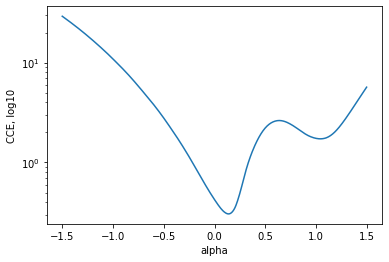

In [ ]:
plt.plot(alphas, loss_curve)
plt.yscale('log')
plt.xlabel('alpha')
plt.ylabel('CCE, log10')

## 2D

In [ ]:
# увеличив step, можно значительно ускорить вычисления
# однако вместе с этим теряется разрешение
alphas = []
vals = np.arange(-150, 151, step=5)/100
size = vals.size

# создаём заданный растр
for a1 in vals:
    for a2 in vals:
        alphas.append((a1, a2))

alphas = np.array(alphas)

In [ ]:
Z = []
for a1, a2 in tqdm(alphas):
    state_dict = model.state_dict()
    for (k, v), v_new, v_new2 in zip(state_dict_backup.items(), theta1, theta2):
        # линейная интерполяция
        tensor = v.clone().detach() + \
                 a1*(torch.tensor(v_new, device=device) - \
                     v.clone().detach())
        # ещё раз со вторым вектором
        tensor = tensor + a2*(torch.tensor(v_new2, device=device) - tensor)
        state_dict[k] = tensor
        #print(k, tensor, v_new)
    model.load_state_dict(state_dict)
    loss = []
    with torch.no_grad(): # отключение автоматического дифференцирования
        for i, data in enumerate(dataloader['test'], 0):
            inputs, labels = data
            # на GPU
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs).detach()#.cpu().numpy()
            loss.append(criterion2(outputs, labels).detach().cpu().numpy())
    Z.append(np.concatenate(loss).mean())
ZZ = np.array(Z)

  0%|          | 0/3721 [00:00<?, ?it/s]

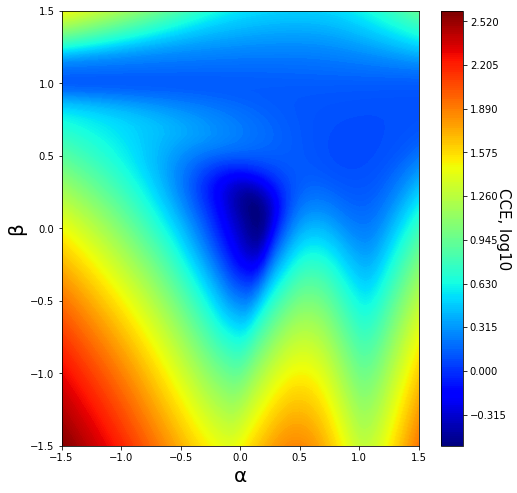

In [ ]:
# настройка размера графика
plt.figure(figsize=(8, 8))
# отрисовка закрашенных контуров, аналогично 2 части 1 ЛР
cs = plt.contourf(alphas[:,0].reshape(size, size),
             alphas[:,1].reshape(size, size),
             np.log10(ZZ.reshape(size, size)),
             levels=255,
             cmap=plt.cm.jet,
             )
# установка цветовой шкалы и её названия
plt.colorbar(cs).ax.set_ylabel('CCE, log10', rotation=270, fontsize=15)
# установка названий осям X, Y
plt.xlabel('α', fontsize=20)
plt.ylabel('β', fontsize=20)
plt.show()

## 3D

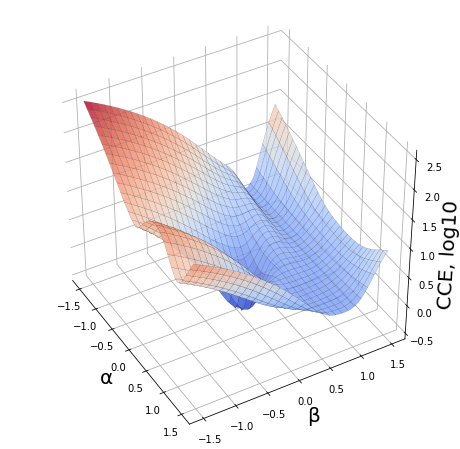

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": "3d"})
# установка названий осям X, Y и Z
ax.set_xlabel('α', fontsize=20)
ax.set_ylabel('β', fontsize=20)
ax.set_zlabel('CCE, log10', fontsize=20)
# выставление прозрачности сетки, для красоты
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# отрисовка 3D поверхности, данные для отрисовки аналогичны contourf
surf = ax.plot_surface(alphas[:,0].reshape(size, size),
                       alphas[:,1].reshape(size, size),
                       np.log10(ZZ.reshape(size, size)),
                       cmap=plt.cm.coolwarm,
                       linewidth=0.1,
                       edgecolors='k',
                       alpha=0.8,
                       antialiased=True)
# первый агрумент - вращение вокруг XY, второрй аргумент - вокруг YZ
ax.view_init(40, -30)